## Pokemon Type Classification

With this project, I aimed to train a random forest classifier that could classify a Pokemon's primary type based on their stats in the game. A random forest classifier build on a decision tree classifier, which basically uses a tree of various conditions, and trains these conditions to develop an optimal tree for classifying the data. 

Dataset Source: Kaggle

### Data Cleaning

In [3]:
# import data analysis packages
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for model development
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
# read in Pokemon dataset from Kaggle
pokemon = pd.read_csv('../Data/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# analyze missingness in Pokemon dataset
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

The only missingness in this dataset is the missingness of Type 2. However, this data is missing is not missing at random, since Pokemon that only have a single type attribute will not have a Type 2, and will therefore have missingness in this column of the data frame.

In [6]:
# rename columns
pokemon.columns = ['number', 'name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 
                   'speed', 'generation', 'legendary']

In [7]:
# analyze data types
pokemon.dtypes

number         int64
name          object
type_1        object
type_2        object
total          int64
hp             int64
attack         int64
defense        int64
sp_atk         int64
sp_def         int64
speed          int64
generation     int64
legendary       bool
dtype: object

In [9]:
# view shape of dataset
pokemon.shape

(800, 13)

### Exploratory Data Analysis

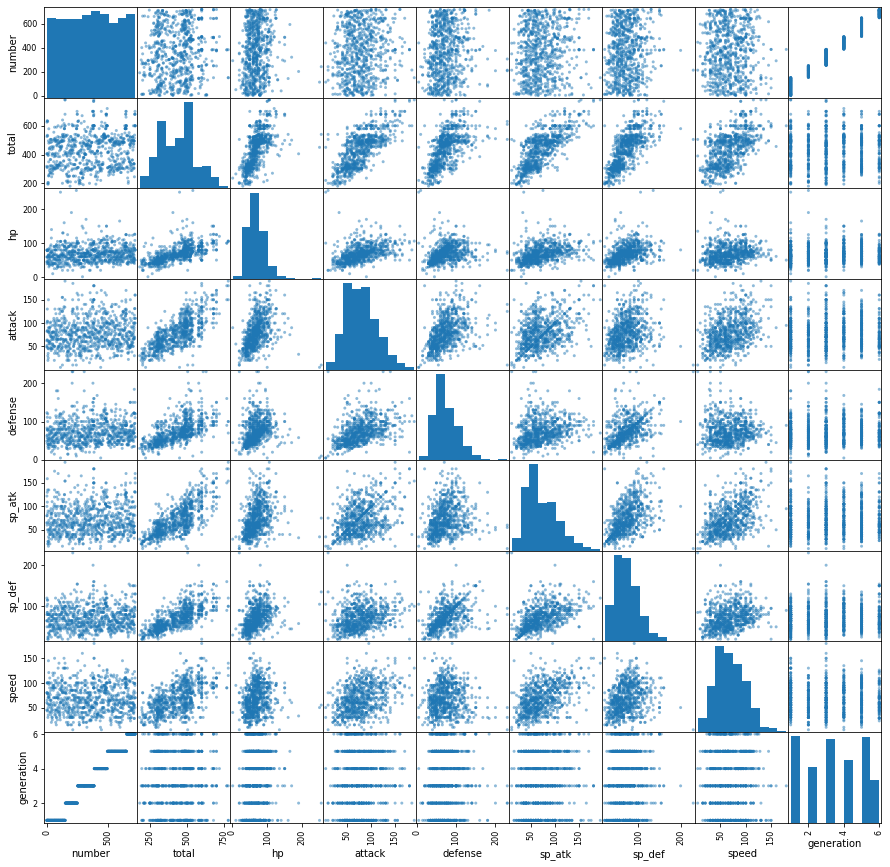

In [10]:
# generate scatter matrix of quantitative variables
pd.plotting.scatter_matrix(pokemon.drop(['legendary'], axis=1), figsize=(15, 15));

### Model Development

In [11]:
# preview dataframe
pokemon.head()

,number,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
# view distribution of types
pokemon['type_1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64

In [14]:
# drop flying types from model data
model_df = pokemon[pokemon['type_1'] != 'Flying']

In [69]:
# separate features from labels
X_data = model_df.drop(['number', 'name', 'type_1', 'type_2', 'total', 'generation'], axis=1)
X_data['legendary'] = X_data['legendary'].astype(np.int64)

y_data = model_df['type_1']

In [70]:
# add engineered features
X_data['atk/sp_atk'] = X_data['attack'] / X_data['sp_atk']
X_data['def/sp_def'] = X_data['defense'] / X_data['sp_def']
X_data['atk/def'] = X_data['attack'] / X_data['defense']
X_data['sp_atk/sp_def'] = X_data['sp_atk'] / X_data['sp_def']
X_data = X_data.drop(['attack', 'defense', 'sp_atk', 'sp_def'], axis=1)
X_data.head()

,hp,speed,legendary,atk/sp_atk,def/sp_def,atk/def,sp_atk/sp_def
0,45,45,0,0.753846,0.753846,1.000000,1.000000
1,60,60,0,0.775000,0.787500,0.984127,1.000000
2,80,80,0,0.820000,0.830000,0.987952,1.000000
3,80,80,0,0.819672,1.025000,0.813008,1.016667
4,39,65,0,0.866667,0.860000,1.209302,1.200000


In [75]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

# create random forest classifier pipeline
pl = Pipeline([
    ('clf', RandomForestClassifier(max_depth=6, n_estimators=170))
])

# fit model
pl.fit(X_train, y_train)

# get training and test predictions
train_predictions = pl.predict(X_train)
test_predictions = pl.predict(X_test)

# calculate training accuracy
print('training accuracy: ' + str((train_predictions == y_train).mean()))

# calculate test accuracy
print('test accuracy: ' + str((test_predictions == y_test).mean()))

training accuracy: 0.6398659966499163
test accuracy: 0.27638190954773867


In [22]:
# set parameter grid for determining tree parameters
params = {
    'clf__n_estimators': np.arange(140, 180, 1),
    'clf__max_depth': np.arange(5, 35, 1)
}

clf = GridSearchCV(pl, params)
clf.fit(X_train, y_train)
clf.best_params_

{'clf__max_depth': 6, 'clf__n_estimators': 170}

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


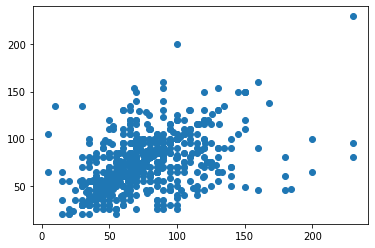

In [18]:
# plotting defense against special defense
plt.scatter(pokemon['Defense'], pokemon['Sp. Def'])

# locate outlier
pokemon.loc[pokemon['Defense'] > 200, ]

Defense Mean: 73.8425
Defense Standard Deviation: 31.164004777146342
Special Defense Mean: 71.9025
Special Defense Standard Deviation: 27.81151728600941
Z Score for Shuckle's Defense: 5.010829035506879
Z Score for Shuckle's Special Defense: 5.684605351594067


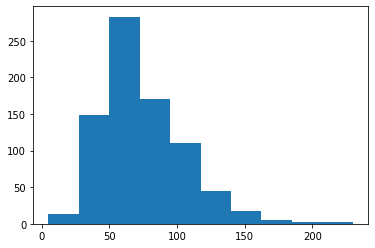

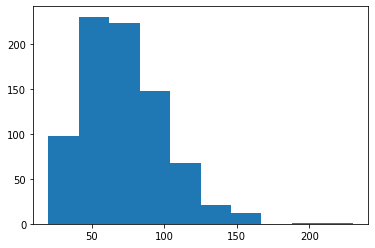

In [37]:
# plot histogram of defense and special defense
plt.figure(1)
plt.hist(pokemon['Defense'])

plt.figure(2)
plt.hist(pokemon['Sp. Def'])

# calculate the mean and standard deviation of Shuckle's defense and special defense
print('Defense Mean: ' + str(np.mean(pokemon['Defense'])))
print('Defense Standard Deviation: ' + str(np.std(pokemon['Defense'])))
print('Special Defense Mean: ' + str(np.mean(pokemon['Sp. Def'])))
print('Special Defense Standard Deviation: ' + str(np.std(pokemon['Sp. Def'])))

shuckle_def = 230
shuckle_sp_def = 230

def_std = (230 - np.mean(pokemon['Defense'])) / np.std(pokemon['Defense'])
sp_def_std = (230 - np.mean(pokemon['Sp. Def'])) / np.std(pokemon['Sp. Def'])
print("Z Score for Shuckle's Defense: " + str(def_std))
print("Z Score for Shuckle's Special Defense: " + str(sp_def_std))

It appears the Shuckle is a defensive outlier, being a Pokemon with both greater than 200 special attack and 200 attack. The histogram distributions for defense and special defense are roughly normal, though not exactly normal. With Z scores of 5, it seems that both Shuckle's defense and special defense are outliers for this dataset of all the Pokemon. Both of these arrays seem to present data with a slight right skew.

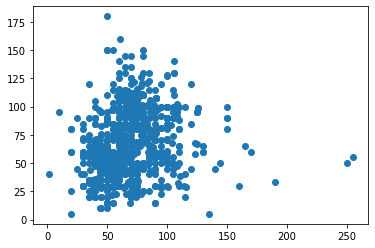

In [9]:
# plotting hp against speed
plt.scatter(pokemon['HP'], pokemon['Speed'])

It seems that there is slight positive correlation between attack and special attack, attack and defense, and a stronger positive correlation between defense and special defense. These trends would make sense, since they would generally be indicative of stronger overall Pokemon (like third stage evolutions), which should have higher overall stats. 

It also appears that there is no correlation, or very little correlation, between a Pokemon's HP and Speed. This would also make sense, since there should be very little relationship between a Pokemon's speed and its HP, since there are Pokemon that would have high HP and speed (like Samurott from Po